# Вебинар 2. Предобработка данных.

**План занятия**
* [Data Science проект](#ds)
* [1. Загрузка данных](#load)
* [2. Приведение типов данных](#types)
    * [Обзор количественных переменных](#numeric)
    * [Обзор номинативных переменных](#cats)
* [Статистика](#stats)
* [3. Обработка пропусков](#nan)
* [4. Обработка выбросов](#outlier)
* [5. Отбор и построение новых признаков](#feature)
    * [Категориальные переменные](#category)
        * [A) Бинарные (дамми) переменные](#dummy)
        * [Б) Feature encoding](#feature_encoding)
    * [Вещественные переменные](#numeric_feature)
        * [A) Feature discretization](#feature_discretization)
        * [Б) Feature binarization](#feature_binarization)
* [6. Сохранение результатов](#save)
* [7. Подготовка данных в реальном проекте](#real)

### **Data Science проект:**<a class='anchor' id='ds'>
1. Постановка задачи
2. Получение данных
_________
3. **Анализ данных**
4. Визуализация данных
5. **Предобработка данных**
6. **Генерация новых признаков**
7. Построение модели
8. Оценка качества
______
9. Внедрение модели
10. Мониторинг качества и улучшение модели

**Подключение библиотек и скриптов**

In [3]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

**Пути к директориям и файлам**

In [4]:
DATASET_PATH = './housing.csv'
PREPARED_DATASET_PATH = './housing_prepared_lmv.csv'

### 1. Загрузка данных <a class='anchor' id='load'>

**Описание задачи**

Цель - предсказать стоимость дома 

Зачем?  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений (Авито, Циан, ...):_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [9]:
df = pd.read_csv(DATASET_PATH, sep=',')
#df.head(10)
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


### 2. Приведение типов данных<a class='anchor' id='types'>

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [6]:
df['id'] = df['id'].astype(str)

### Обзор количественных переменных<a class='anchor' id='numeric'>
    
*Количественные (непрерывные) переменные*  - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.

In [7]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


С помощью .describe можно получить первичное понимание того, что из себя представляют данные

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


### Статистика<a class='anchor' id='stats'>

In [10]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

**Среднее арифметическое**

In [11]:
mean = a.sum() / len(a)
mean

3.0

**Дисперсия и стандартное отклонение**

*Дисперсия* - это показатель вариации, который представляет собой средний квадрат отклонений от математического ожидания (среднее арифметическое). Она выражает разброс чисел относительно среднего значения.

*Стандартное отклонение* (среднеквадратичное отклонение) - это величина, характеризующая разброс данных относительно среднего значения.

In [12]:
variance = np.mean((a - mean) ** 2)
std = np.sqrt(variance)
variance, std

(2.0, 1.4142135623730951)

Подсчет с помощью numpy

In [13]:
mean_np = np.mean(a)
std_np = np.std(a)
var_np = np.var(a)
print(mean_np, std_np, var_np)

3.0 1.4142135623730951 2.0


**Медиана**

*Медиана* - значение, которая делит его на две равные части или же проще говоря, это середина отсортированной выборки.

In [14]:
a = [3, 4, 5, 6, 1, 2, 2, 6, 2]
a = np.sort(a)
a

array([1, 2, 2, 2, 3, 4, 5, 6, 6])

**Квантили**

*Квартили* - это значения, которые делят выборку на 4 равные (по количеству объектов) части.
Откуда следует, что вторая квартиль - это медиана.

* 0 квартиль = 0 квантиль = 0 процентиль
* 1 квартиль = 0,25 квантиль = 25 процентиль
* 2 квартиль = .5 квантиль = 50 процентиль (медиана)
* 3 квартиль = .75 квантиль = 75 процентиль
* 4 квартиля = 1 квантиль = 100 процентиль

In [15]:
np.quantile(a, 0.5)

3.0

In [16]:
np.median(a)

3.0

In [17]:
np.quantile(a, q=0.25)

2.0

In [18]:
np.quantile(a, q=0.75)

5.0

**Мода**

Мода - это объект с максимальной частотой или проще говоря, самый популярный (частовстречаемый) объект в выборке.

In [19]:
a

array([1, 2, 2, 2, 3, 4, 5, 6, 6])

In [20]:
mode(a)

ModeResult(mode=array([2]), count=array([3]))

Применим статистику к нашим данным

In [21]:
df['total_rooms'].value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

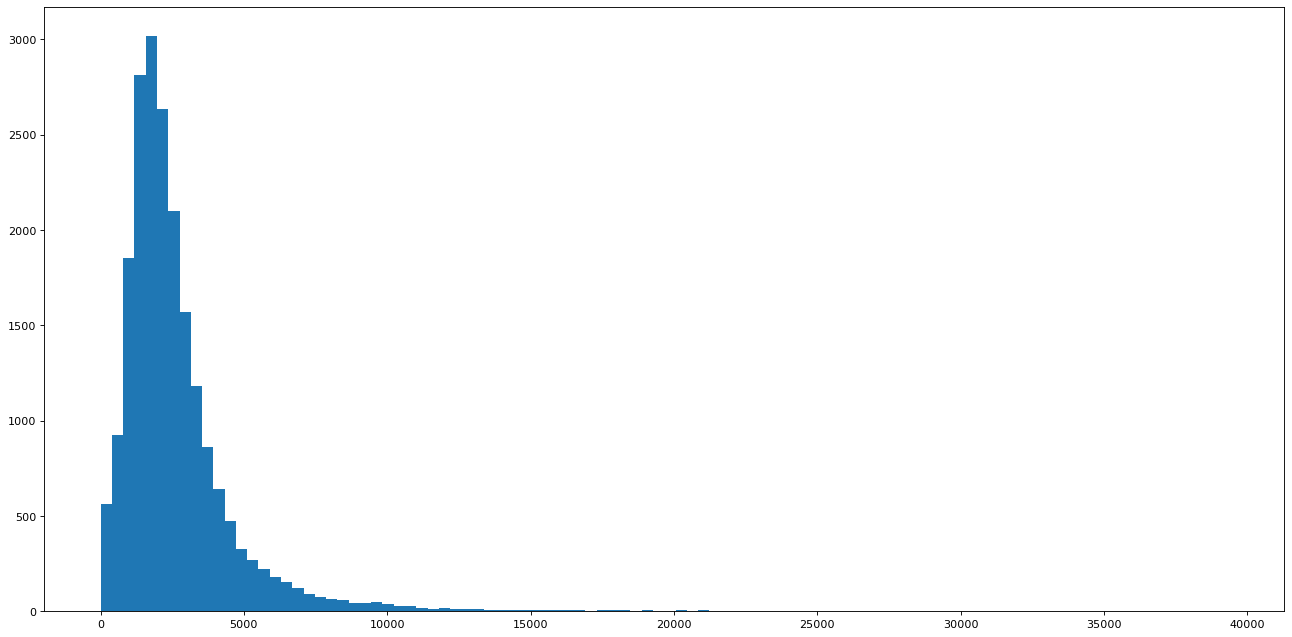

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10), dpi=80)
plt.hist(df['total_rooms'], bins = 100)
plt.show()

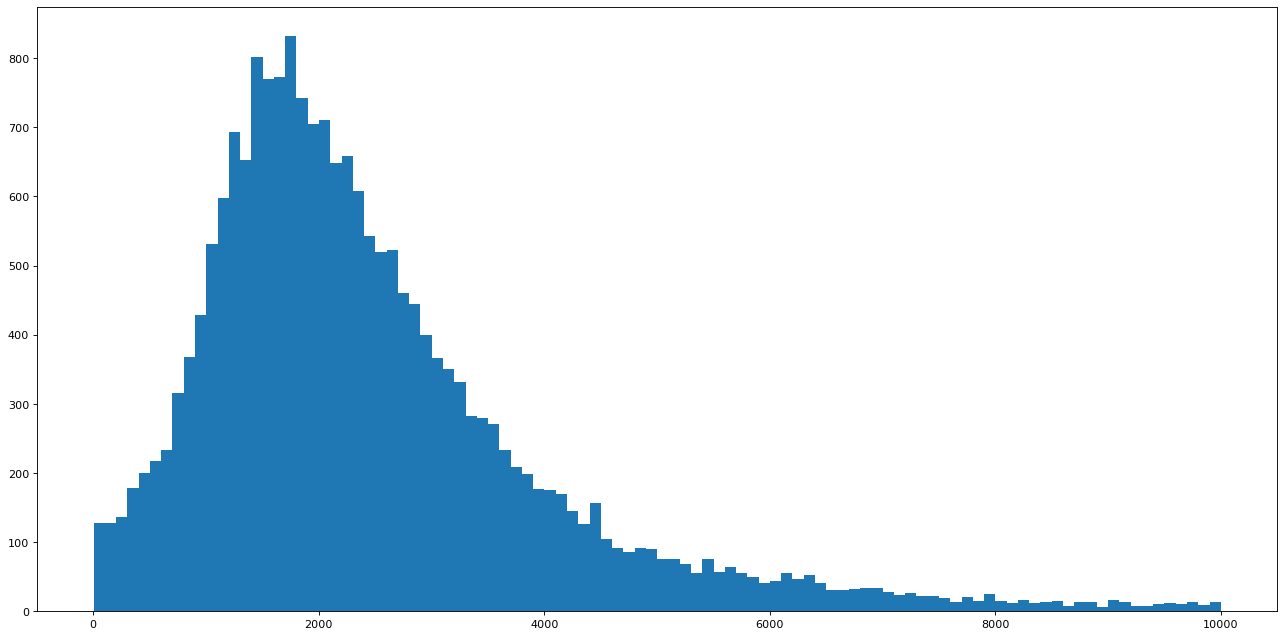

In [23]:
plt.figure(figsize=(20, 10), dpi=80)
plt.hist( df[df['total_rooms']<10000]['total_rooms'], bins = 100)

plt.show()

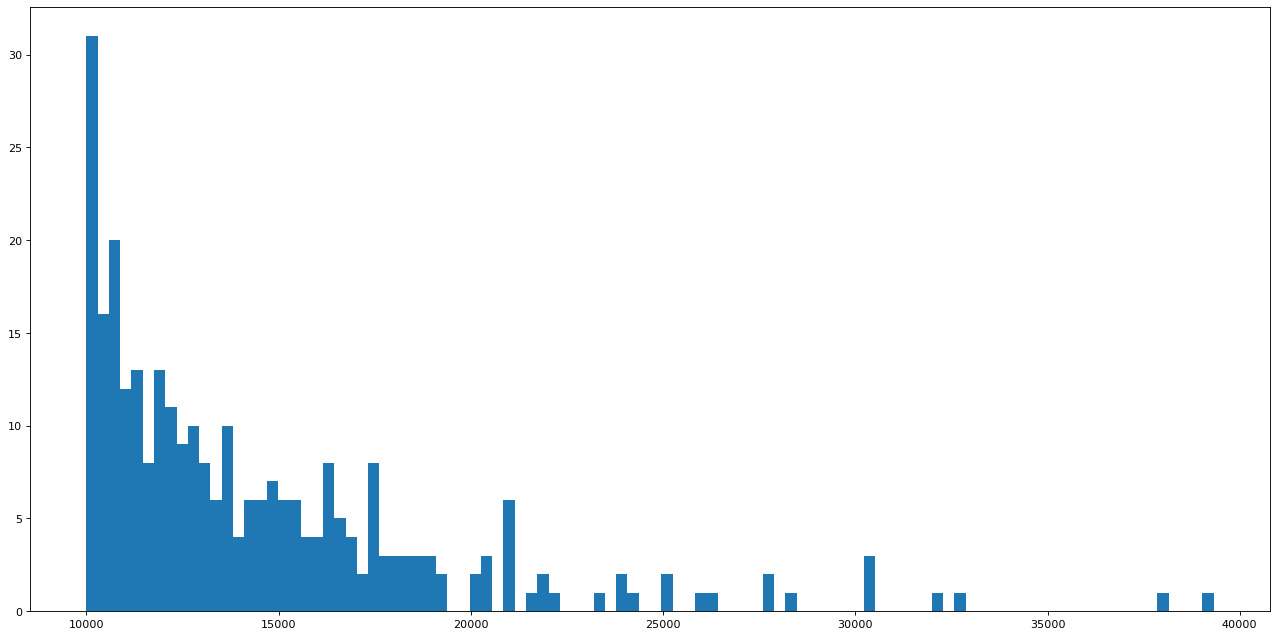

In [11]:
plt.figure(figsize=(20, 10), dpi=80)
plt.hist( df[df['total_rooms']>=10000]['total_rooms'], bins = 100)

plt.show()

### Обзор номинативных переменных<a class='anchor' id='cats'>
    
*Номинативная (категориальная) переменная* - тип дискретной переменной, качественная (неколичественная) переменная величина
*Категориальные переменные* - это переменная с ограниченным числом уникальных значений или категорий (например, пол или религия). Категориальные переменные могут быть либо номинальные , либо порядковые . ... Примеры номинальных переменных включают регион, почтовый индекс или религию.

In [13]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head(5)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [35]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [37]:
df['ocean_proximity'].nunique()

6

### 3. Обработка пропусков<a class='anchor' id='nan'>

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [38]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

Создадим вспомогательный признак и заполним его 0, если пропуска в housing_median_age нет и 1, когда пропуски есть 

In [39]:
for c in ['housing_median_age', 'total_bedrooms', 'population']:
    df[c+'_nan'] = 0
    df.loc[df[c].isna(), c+'_nan'] = 1
    median = df[c].median()
    df[c] = df[c].fillna(median)

In [40]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
total_bedrooms_nan        0
population_nan            0
dtype: int64

**ocean_proximity**

In [41]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [14]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

Заменим значение "-" в признаке ocean_proximity на самое популярное значение в признаке, то есть на моду.

In [42]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [43]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

### 4. Обработка выбросов<a class='anchor' id='outlier'>
    
**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [44]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,total_bedrooms_nan,population_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,0.034981,0.010029,0.029021,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,0.183735,0.099644,0.167870,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,0.000000,0.000000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


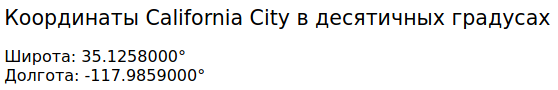

**longitude** Долгота

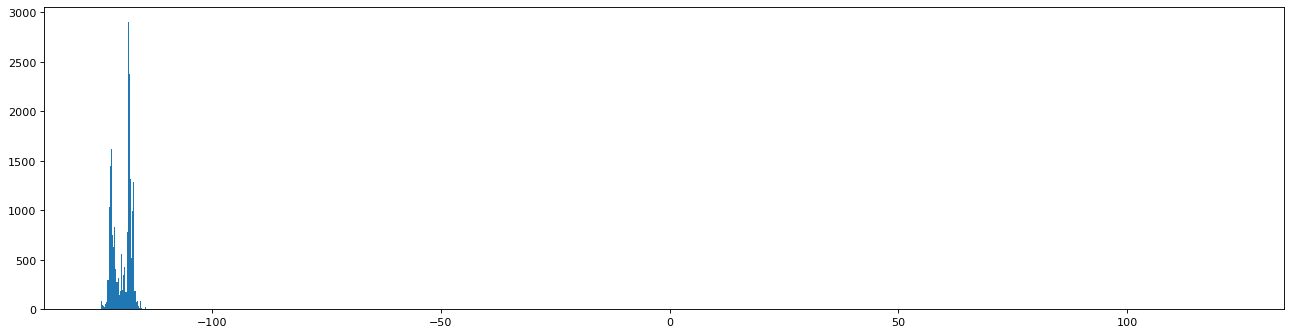

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['longitude'], bins = 1000)
plt.show()

In [46]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [47]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [48]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

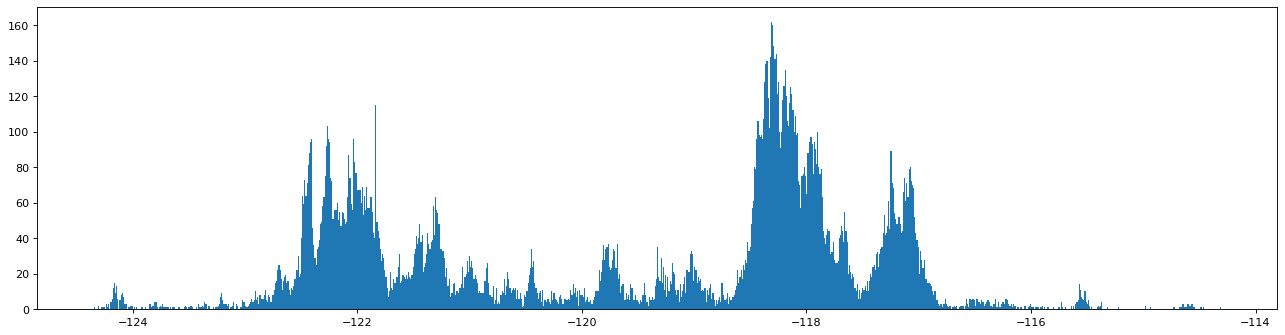

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['longitude'], bins = 1000)
plt.show()

**latitude**

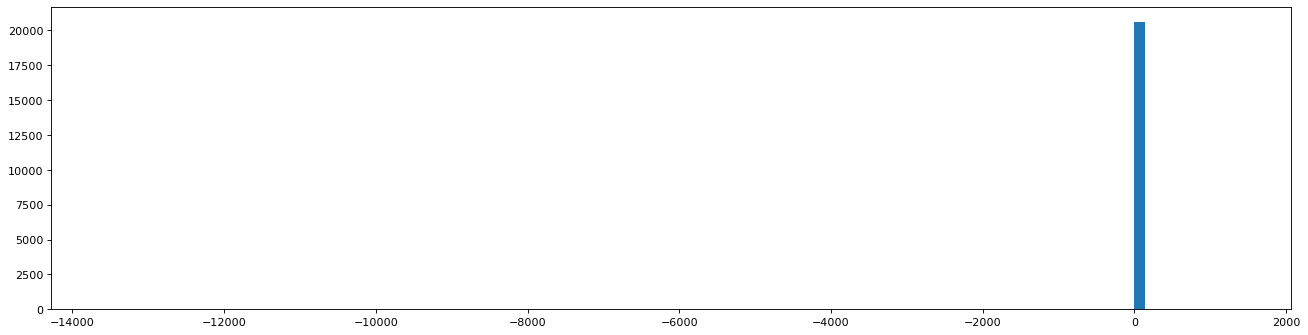

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['latitude'], bins = 100)
plt.show()

In [51]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [52]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

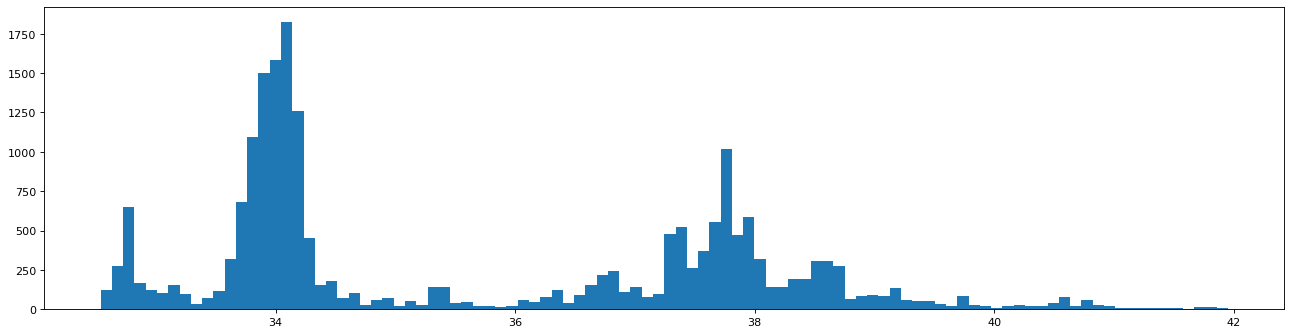

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['latitude'], bins = 100)
plt.show()

**total_rooms**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

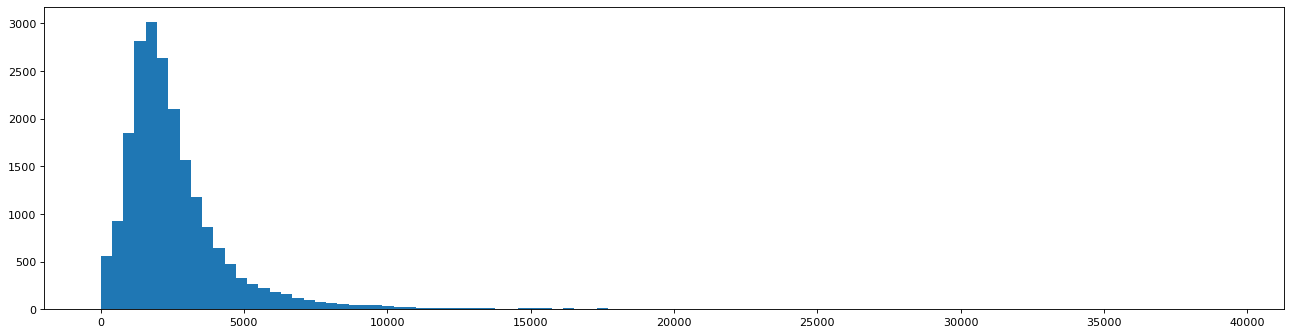

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['total_rooms'], bins = 100)
plt.show()

In [55]:
total_rooms_max_value = np.quantile(df['total_rooms'], q=0.975)
total_rooms_max_value

8069.074999999993

In [56]:
total_rooms_min_value = np.quantile(df['total_rooms'], q=0.025)
total_rooms_min_value

370.975

In [57]:
condition = (df['total_rooms'] > total_rooms_max_value) | (df['total_rooms'] < total_rooms_min_value)
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,total_bedrooms_nan,population_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59,0,0,0,0,0,0
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61,0,0,0,0,0,0
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73,0,0,0,0,0,0
81,-122.27,37.81,52.0,210.0,56.0,183.0,56.0,1.1667,112500.0,NEAR BAY,81,0,0,0,0,0,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY,82,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,INLAND,20578,0,0,0,0,0,0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND,20620,0,0,0,0,0,0
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625,0,0,0,0,0,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,20627,0,0,0,0,0,0


In [58]:
df.loc[condition, 'total_rooms'] = df['total_rooms'].median()
df['total_rooms'].describe()

count    20640.000000
mean      2435.698837
std       1358.232607
min        371.000000
25%       1511.000000
50%       2127.000000
75%       3006.000000
max       8069.000000
Name: total_rooms, dtype: float64

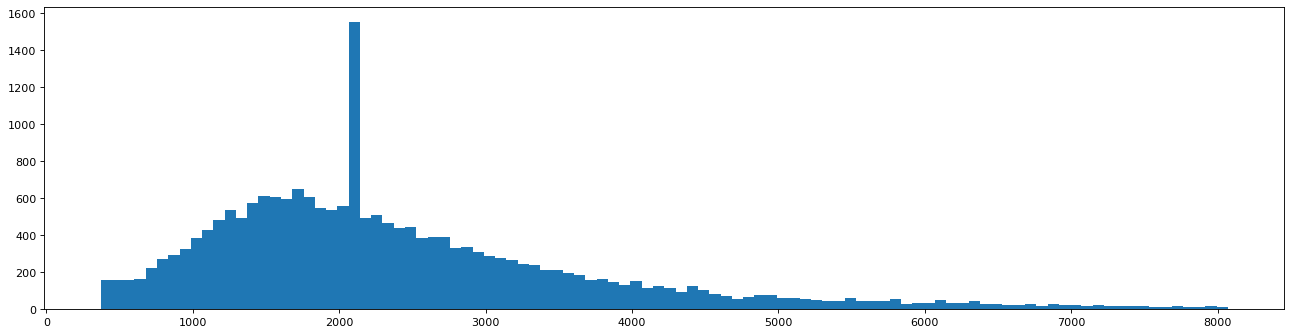

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df['total_rooms'], bins = 100)
plt.show()

### 5. Отбор и построение новых признаков<a class='anchor' id='feature'>

Исключаем признак "id"

In [60]:
df.drop(columns='id', inplace=True)

In [61]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'housing_median_age_nan',
       'total_bedrooms_nan', 'population_nan', 'ocean_proximity_nan',
       'longitude_outlier', 'latitude_outlier'],
      dtype='object')

**Количественные переменные**

In [62]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [63]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категориальные переменные**<a class='anchor' id='category'>

Неколичественные строковые признаки всегда нужно переводить в числовое представление, так как многие модели машинного обучения не способны работать со строками.

Хороший обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

In [64]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [17]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND,...,1,0,0,0,0,0,1,0,0,0


In [19]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1828,-122.31,37.92,12.0,1895.0,600.0,983.0,519.0,2.5000,195800.0,NEAR BAY,...,0,0,1,0,0,0,0,0,1,0
18296,-122.12,37.39,34.0,3561.0,497.0,1336.0,501.0,8.9172,500001.0,NEAR BAY,...,0,0,1,0,0,0,0,0,1,0
15439,-117.23,33.20,NaN,2284.0,360.0,999.0,356.0,4.8929,212500.0,<1H OCEAN,...,0,0,0,0,0,1,0,0,0,0
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163700.0,<1H OCEAN,...,0,0,0,0,0,1,0,0,0,0
4867,-118.28,34.04,20.0,1193.0,454.0,1880.0,453.0,2.1806,180000.0,<1H OCEAN,...,0,0,0,0,0,1,0,0,0,0
19165,-122.68,38.40,32.0,2826.0,627.0,1767.0,628.0,3.1047,141400.0,<1H OCEAN,...,0,0,0,0,0,1,0,0,0,0
5239,-118.23,33.93,39.0,2065.0,532.0,2015.0,535.0,0.8478,104900.0,<1H OCEAN,...,0,0,0,0,0,1,0,0,0,0
556,-122.25,37.77,43.0,4329.0,1110.0,2086.0,1053.0,2.9750,243400.0,NEAR BAY,...,0,0,1,0,0,0,0,0,1,0
13646,-117.31,34.08,43.0,1697.0,387.0,1181.0,352.0,1.9234,74600.0,INLAND,...,1,0,0,0,0,0,1,0,0,0
16257,-121.25,37.97,34.0,1288.0,344.0,846.0,293.0,1.7895,63100.0,INLAND,...,1,0,0,0,0,0,1,0,0,0


**Б) Feature encoding**<a class='anchor' id='feature_encoding'>

Описание категории каким-то числом

In [20]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_bedrooms']]
df_cat = pd.DataFrame(df_cat)
print(df_cat.columns)
df_cat

Index(['ocean_proximity', 'total_bedrooms'], dtype='object')


,ocean_proximity,total_bedrooms
0,-,291.0
1,<1H OCEAN,438.0
2,INLAND,423.0
3,ISLAND,512.0
4,NEAR BAY,423.0
5,NEAR OCEAN,464.0


In [21]:
df_cat.rename(columns={'total_bedrooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
0,-,291.0
2,INLAND,423.0
4,NEAR BAY,423.0
1,<1H OCEAN,438.0
5,NEAR OCEAN,464.0
3,ISLAND,512.0


In [24]:
df = df.merge(df_cat, on=['ocean_proximity'])

df.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,NEAR OCEAN,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y,median_rooms
18370,-118.38,33.81,20.0,1975.0,306.0,703.0,292.0,8.5491,410300.0,NEAR OCEAN,...,1,0,0,0,0,0,1,464.0,464.0,464.0
18168,-118.18,33.83,39.0,3622.0,745.0,1330.0,648.0,3.3125,425500.0,NEAR OCEAN,...,1,0,0,0,0,0,1,464.0,464.0,464.0
13650,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
14988,-121.47,38.52,26.0,2177.0,638.0,1971.0,560.0,1.2575,66800.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
15901,-117.29,34.14,52.0,1683.0,266.0,646.0,256.0,4.0481,97300.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
2721,-118.44,34.21,37.0,1665.0,335.0,1011.0,343.0,4.8703,185100.0,<1H OCEAN,...,0,0,1,0,0,0,0,438.0,438.0,438.0
15977,-117.31,34.08,43.0,1697.0,387.0,1181.0,352.0,1.9234,74600.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
13013,-118.17,34.86,21.0,2370.0,540.0,1488.0,554.0,2.7361,83300.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
17335,-120.89,37.52,42.0,1200.0,221.0,647.0,192.0,2.5402,157500.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0
12253,-119.83,36.80,16.0,6101.0,1200.0,3407.0,1134.0,3.1250,80800.0,INLAND,...,0,0,0,1,0,0,0,423.0,423.0,423.0


**Вещественные переменные**<a class='acnhor' id='numeric_feature'>

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

**A) Feature discretization** <a class='acnhor' id='feature_discretization'>

[Статья на эту тему](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...


In [25]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [26]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y,median_rooms,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,0,0,1,0,423.0,423.0,423.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,0,0,1,0,423.0,423.0,423.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,0,0,1,0,423.0,423.0,423.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,0,0,1,0,423.0,423.0,423.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,0,0,1,0,423.0,423.0,423.0,4


**Б) Feature binarization** <a class='anchor' id='feature_binarization'>

[Статья на эту тему](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 1 признак

1 - новый дом,<br>0 - старый

In [29]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  

    return X

In [30]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y,median_rooms,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,0,1,0,423.0,423.0,423.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,0,1,0,423.0,423.0,423.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,0,1,0,423.0,423.0,423.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,0,1,0,423.0,423.0,423.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,0,1,0,423.0,423.0,423.0,4,0


In [28]:
# 2 способ 
v = [1 if x <= 5 else 0 for x in df['housing_median_age']]
df['age_binary_cat'] = v

### Обобщение
* Генерация новых признаков
    1. Категориальные признаки
        * pd.get_dummies
        * Feature Encoding
    2. Вещественные признаки
        * Feature discretization (optbinning)
        * Feature binarization
    3. Основываясь на логике задачи
    4. Автоматическая генерация фичей (к примеру, библиотека feature tools)

### 6. Сохранение результатов<a class='anchor' id='save'>

In [74]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

In [75]:
len(df.columns)

26

In [107]:
import numpy as np
import pandas as pd

In [108]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None

        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
                                                                      
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
                
        return df


In [31]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        self.ocean_proximity = df['ocean_proximity'].mode()[0]
        self.total_rooms_max_value = np.quantile(df['total_rooms'], q=0.975)
        self.total_rooms_min_value = np.quantile(df['total_rooms'], q=0.025)
        self.total_rooms = df['total_rooms'].median()
                                                                      
    def age_to_cat(self, X):
        X['age_cat'] = 0
        X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
        X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
        X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
        X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4
        return X

    def age_to_binary_cat(self, X):
        X['age_binary_cat'] = 0
        X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  
        return X

    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        
        for c in ['housing_median_age', 'total_bedrooms', 'population']:
            df[c+'_nan'] = 0
            df.loc[df[c].isna(), c+'_nan'] = 1
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
                
        df['ocean_proximity_nan'] = 0
        df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1
        df.replace( {'ocean_proximity': {'-': self.ocean_proximity}}, inplace=True)
        
        # 2. Выбросы (outliers)
        
        df['longitude_outlier'] = 0
        df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1
        df['latitude_outlier'] = 0
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        condition = (df['total_rooms'] > self.total_rooms_max_value) | (df['total_rooms'] \
                                                                        < self.total_rooms_min_value)
        df.loc[condition, 'total_rooms'] = self.total_rooms
        df.drop(columns='id', inplace=True)
        
        # 3. Новые признаки (features)
        
        df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_bedrooms']]
        df_cat = pd.DataFrame(df_cat)
        df_cat.rename(columns={'total_bedrooms': 'median_rooms'}, inplace=True)
        df = df.merge(df_cat, on=['ocean_proximity'])
        df = self.age_to_cat(df)               
        df = self.age_to_binary_cat(df)
        
        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100
        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)            
        return df



In [32]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep = ';')

32674.31738565891
test rmse: 50335.729586116715 


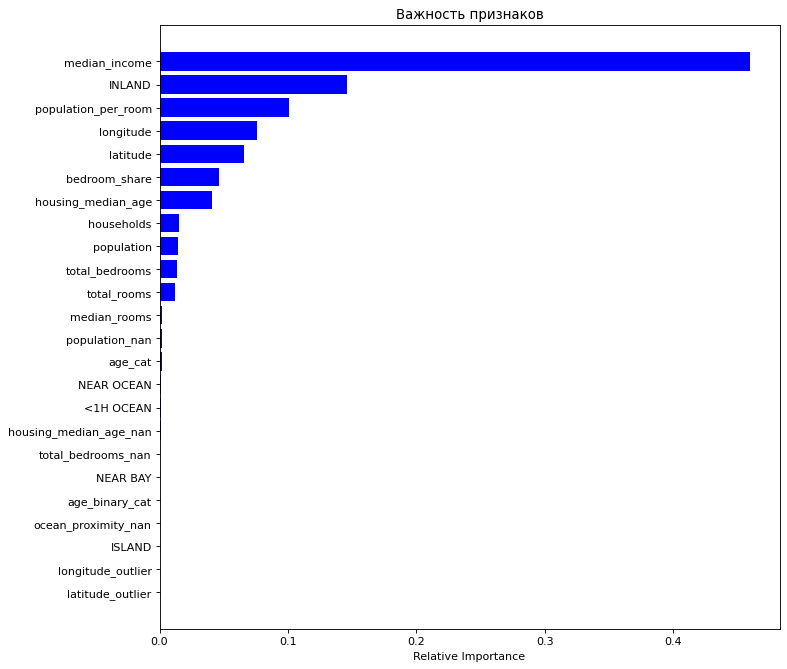

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tqdm.notebook import tqdm

X = df.copy()
X.drop(['median_house_value', 'ocean_proximity'], axis = 1, inplace=True)
feature_names = X.columns
y = list(df['median_house_value'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

# Случайный лес
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

test_mse = np.mean(((y_pred - y_test)**2))
test_rmse = np.sqrt(test_mse)
print(f'test rmse: {test_rmse} ')

importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

mae0 = mean_absolute_error(y_test, y_pred)

In [111]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

### 7. Подготовка данных в реальном проекте<a class='anchor' id='real'>

In [121]:
import numpy as np
import pandas as pd

In [122]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        self.ocean_proximity = df['ocean_proximity'].mode()[0]
        self.total_rooms_max_value = np.quantile(df['total_rooms'], q=0.975)
        self.total_rooms_min_value = np.quantile(df['total_rooms'], q=0.025)
        self.total_rooms = df['total_rooms'].median()
                                                                      
    def age_to_cat(self, X):
        X['age_cat'] = 0
        X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
        X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
        X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
        X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4
        return X

    def age_to_binary_cat(self, X):
        X['age_binary_cat'] = 0
        X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  
        return X

    def housing_data_clean(self, input_df):
        input_df['rooms_per_household'] = input_df['total_rooms']/input_df['households']
        input_df['bedrooms_per_household'] = input_df['total_bedrooms']/input_df['households']
        input_df['bedrooms_per_room'] = input_df['total_bedrooms']/input_df['total_rooms']
        input_df['population_per_household'] = input_df['population']/input_df['households']
        #input_df = input_df.drop(['total_bedrooms','total_rooms'], axis=1)
        return input_df
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        
        for c in ['housing_median_age', 'total_bedrooms', 'population']:
            df[c+'_nan'] = 0
            df.loc[df[c].isna(), c+'_nan'] = 1
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
                
        df['ocean_proximity_nan'] = 0
        df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1
        df.replace( {'ocean_proximity': {'-': self.ocean_proximity}}, inplace=True)
        
        # 2. Выбросы (outliers)
        
        df['longitude_outlier'] = 0
        df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1
        df['latitude_outlier'] = 0
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        condition = (df['total_rooms'] > self.total_rooms_max_value) | (df['total_rooms'] \
                                                                        < self.total_rooms_min_value)
        df.loc[condition, 'total_rooms'] = self.total_rooms
        df.drop(columns='id', inplace=True)
        
        # 3. Новые признаки (features)
        
        df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_bedrooms']]
        df_cat = pd.DataFrame(df_cat)
        df_cat.rename(columns={'total_bedrooms': 'median_rooms'}, inplace=True)
        df = df.merge(df_cat, on=['ocean_proximity'])
        df = self.age_to_cat(df)               
        df = self.age_to_binary_cat(df)
        
        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100
        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)            
        df = self.housing_data_clean(df)
        return df


In [123]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared_lmv_cls.csv'

In [124]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep = ';')

In [125]:
len(df.columns)

30

In [126]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,6.281853,1.081081,0.172096,2.181467


In [93]:
df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
housing_median_age_nan    0
total_bedrooms_nan        0
population_nan            0
ocean_proximity_nan       0
longitude_outlier         0
latitude_outlier          0
median_rooms              0
age_cat                   0
age_binary_cat            0
bedroom_share             0
population_per_room       0
<1H OCEAN                 0
INLAND                    0
ISLAND                    0
NEAR BAY                  0
NEAR OCEAN                0
dtype: int64

In [94]:
df.dtypes

longitude                 float64
latitude                  float64
housing_median_age        float64
total_rooms               float64
total_bedrooms            float64
population                float64
households                float64
median_income             float64
median_house_value        float64
ocean_proximity            object
housing_median_age_nan      int64
total_bedrooms_nan          int64
population_nan              int64
ocean_proximity_nan         int64
longitude_outlier           int64
latitude_outlier            int64
median_rooms              float64
age_cat                     int64
age_binary_cat              int64
bedroom_share             float64
population_per_room       float64
<1H OCEAN                   uint8
INLAND                      uint8
ISLAND                      uint8
NEAR BAY                    uint8
NEAR OCEAN                  uint8
dtype: object

33461.81020155038
Ошибка увеличилась на 2562 или 8%
test rmse: 50890.917327460396 


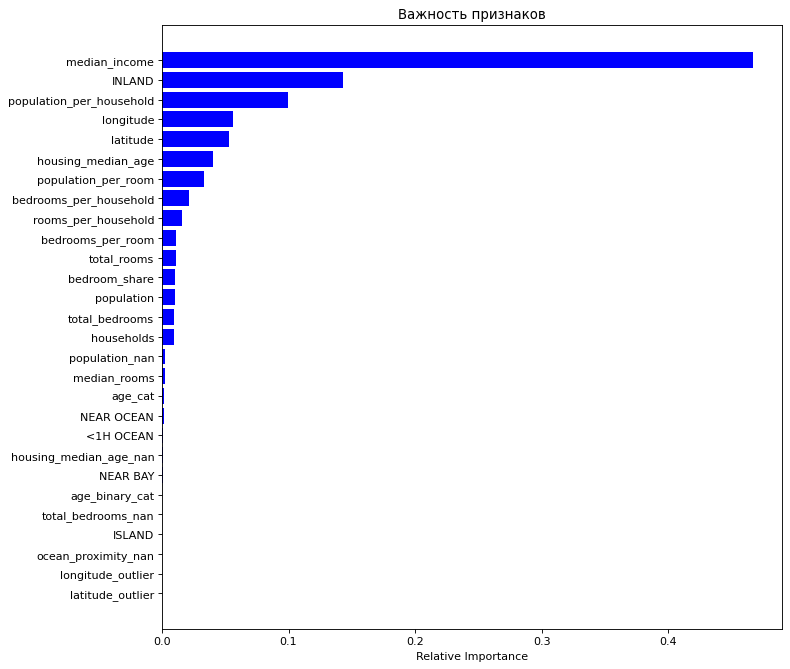

In [127]:
X = df.copy()
X.drop(['median_house_value', 'ocean_proximity'], axis = 1, inplace=True)
feature_names = X.columns
y = list(df['median_house_value'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

# Случайный лес
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred)
print(mae1)
if mae0 >= mae1:
    print(f'Ошибка уменьшилась на {int(round(mae0-mae1, 0))} или {int( round( (mae0-mae1)*100/mae0, 0)) }%')
else:
    print(f'Ошибка увеличилась на {int(round(mae1-mae0, 0))} или {int( round( (mae1-mae0)*100/mae1, 0)) }%')
test_mse = np.mean(((y_pred - y_test)**2))
test_rmse = np.sqrt(test_mse)
print(f'test rmse: {test_rmse} ')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [106]:
df.dtypes

longitude                 float64
latitude                  float64
housing_median_age        float64
total_rooms               float64
total_bedrooms            float64
population                float64
households                float64
median_income             float64
median_house_value        float64
ocean_proximity            object
housing_median_age_nan      int64
total_bedrooms_nan          int64
population_nan              int64
ocean_proximity_nan         int64
longitude_outlier           int64
latitude_outlier            int64
median_rooms              float64
age_cat                     int64
age_binary_cat              int64
bedroom_share             float64
population_per_room       float64
<1H OCEAN                   uint8
INLAND                      uint8
ISLAND                      uint8
NEAR BAY                    uint8
NEAR OCEAN                  uint8
dtype: object

## Эксперименты с моделями

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from tqdm.notebook import tqdm

In [70]:
X = df.copy()
X.drop(['median_house_value', 'ocean_proximity'], axis = 1, inplace=True)
y = list(df['median_house_value'])
feature_names = X.columns
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4,17.209588,0.347265,0,0,0,0,1,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Линейная регрессия

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

49348.41913745604


### Дерево решений

44631.86085271318


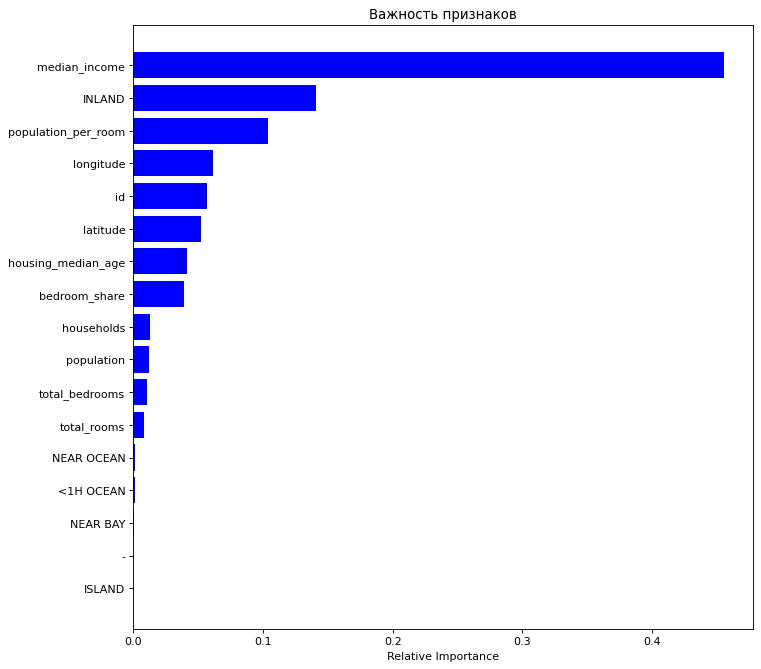

In [75]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Случайный лес

30795.82830232558


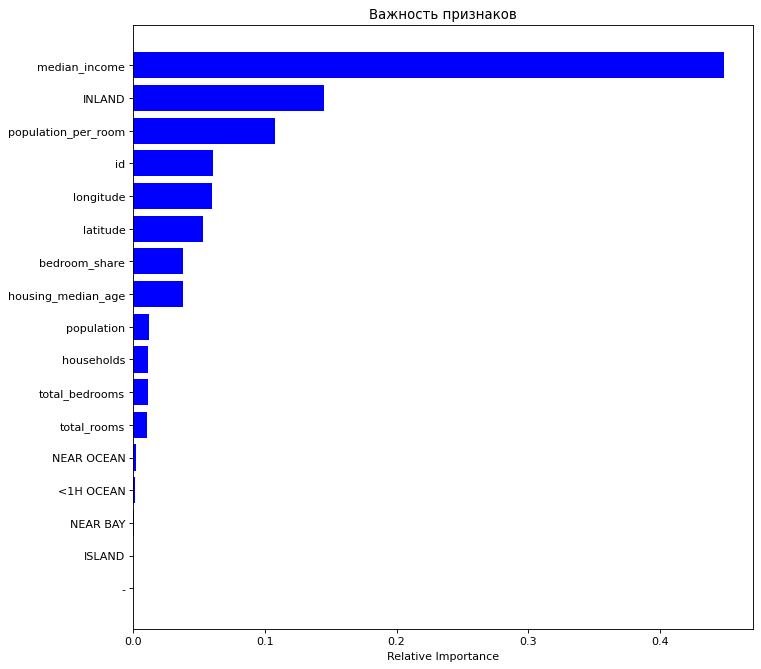

In [76]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Эксперименты с параметрами

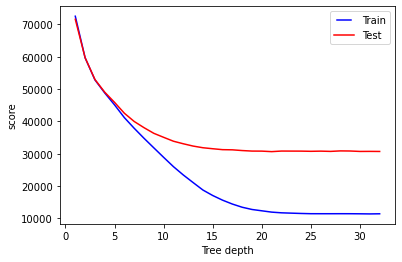

In [77]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in tqdm(max_depths):
    rf = RandomForestRegressor(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train')
line2, = plt.plot(max_depths, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('Tree depth')
plt.show()

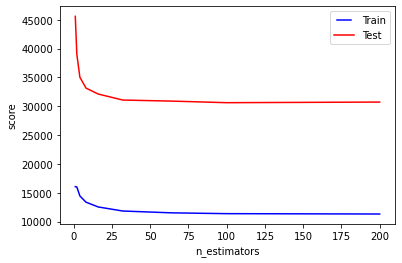

In [78]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for n in tqdm(n_estimators):
    rf = RandomForestRegressor(n_estimators=n, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.show()

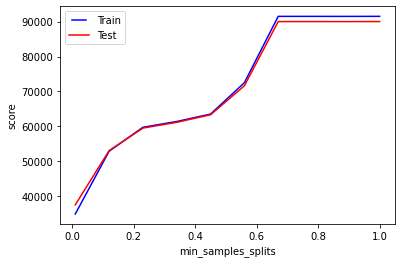

In [79]:
min_samples_splits = np.linspace(0.01, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for n in tqdm(min_samples_splits):
    rf = RandomForestRegressor(min_samples_split=n, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('min_samples_splits')
plt.show()

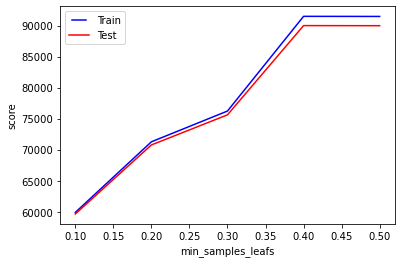

In [80]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for n in tqdm(min_samples_leafs):
    rf = RandomForestRegressor(min_samples_leaf=n, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('min_samples_leafs')
plt.show()

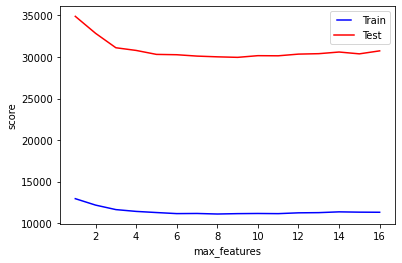

In [81]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for n in tqdm(max_features):
    rf = RandomForestRegressor(max_features=n, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    y_pred = rf.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train')
line2, = plt.plot(max_features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('max_features')
plt.show()

### Итоговый перебор по лучшим параметрам

In [82]:
parameters = {
    'n_estimators': [100, 150, 200],
    'max_features': [5, 6, 7],
    'max_depth': [10, 15, 20],
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1),
    param_grid=parameters,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=10
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 118 out of 135 | elapsed:   58.0s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done 132 out of 135 | elapsed:  1.1min remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.1min finished


2117266618.2879708
30063.44809934505


In [83]:
# Лучшие параметры модели
clf.best_params_

{'max_depth': 20, 'max_features': 7, 'n_estimators': 200}

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

import gc

In [85]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [86]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
#this change below is because column names can't be passed to xgboost with a < symbol
housing['ocean_proximity'][housing['ocean_proximity'] == '<1H OCEAN'] = 'LessThan1h'

#make a stratified split of the data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
	train_set = housing.loc[train_index]
	test_set = housing.loc[test_index]

for set_ in (train_set, test_set):
	set_.drop("income_cat", axis=1, inplace=True)

gc.collect()

def housing_data_clean(input_df):
	input_df['rooms_per_household'] = input_df['total_rooms']/input_df['households']
	input_df['bedrooms_per_household'] = input_df['total_bedrooms']/input_df['households']
	input_df['bedrooms_per_room'] = input_df['total_bedrooms']/input_df['total_rooms']
	input_df['population_per_household'] = input_df['population']/input_df['households']
	input_df = input_df.drop(['total_bedrooms','total_rooms'], axis=1)
	return input_df

train_set = housing_data_clean(train_set)
train_set.head()
#do the same to the test set at the same time so they remain consistent with one another!
test_set = housing_data_clean(test_set)

X_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].values.astype(float)

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].values.astype(float)


#####
# fill numerical values
#####

def fill_median(dataframe, cols):
	"""impute the mean for a list of columns in the dataframe"""
	for i in cols:
		dataframe[i].fillna(dataframe[i].median(skipna=True), inplace = True)
	return dataframe

def cols_with_missing_values(dataframe):
	""" query a dataframe and find the columns that have missing values"""
	return list(dataframe.columns[dataframe.isnull().any()])

def fill_value(dataframe, col, val):
	"""impute the value for a list column in the dataframe"""
	""" use this to impute the median of the train into the test"""
	dataframe[i].fillna(val, inplace = True)
	return dataframe

missing_vals = cols_with_missing_values(X_train)
X_train = fill_median(X_train, missing_vals)

for i in missing_vals:
	X_test = fill_value(X_test, i, X_train[i].median(skipna=True))
    

In [87]:
X_train.drop(['ocean_proximity'], axis=1, inplace=True)
X_test.drop(['ocean_proximity'], axis=1, inplace=True)


num_cols = X_train.columns
num_train_index = X_train.index
num_test_index = X_test.index

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train,index = num_train_index, columns = num_cols)
X_test = pd.DataFrame(X_test,index = num_test_index, columns = num_cols)


gc.collect()

20

31993.244009205428


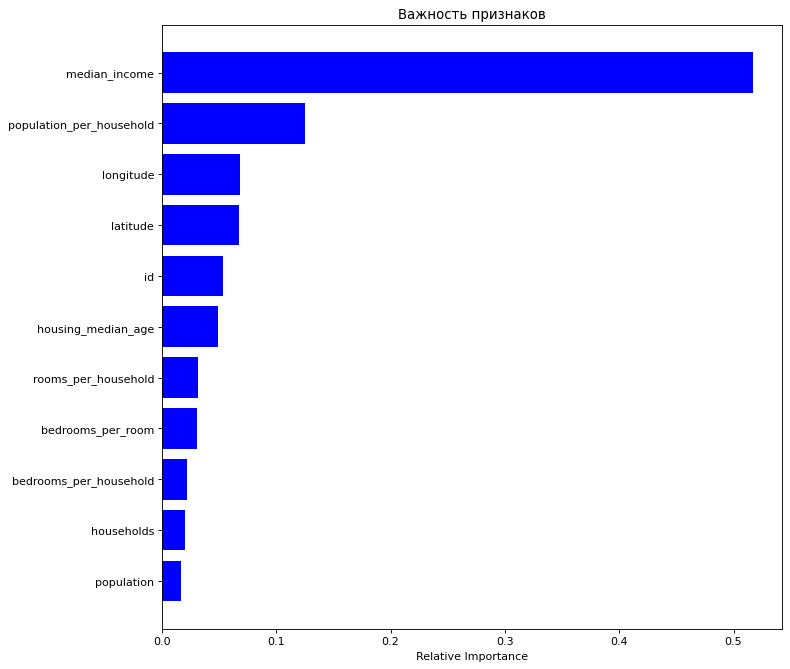

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tqdm.notebook import tqdm

feature_names = X_train.columns

# Случайный лес
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

mae0 = mean_absolute_error(y_test, y_pred)

In [89]:
test_mse = np.mean(((y_pred - y_test)**2))
test_rmse = np.sqrt(test_mse)
print(f'final test rmse: {test_rmse} ')

final test rmse: 48835.470647992486 
